In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dataset=pd.read_csv('/content/penguins_size.csv')

In [3]:
column_names=dataset.columns.tolist()
print(column_names)

['species', 'island', 'culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g', 'sex']


UNIVARIATE ANALYSIS

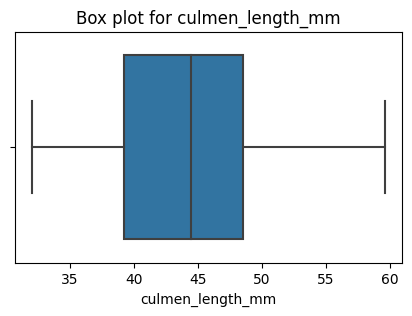

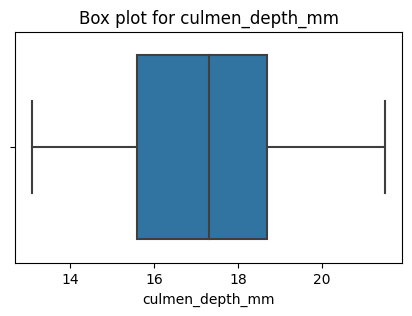

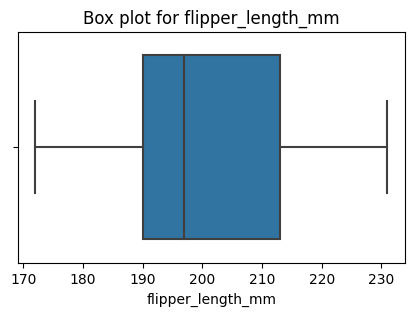

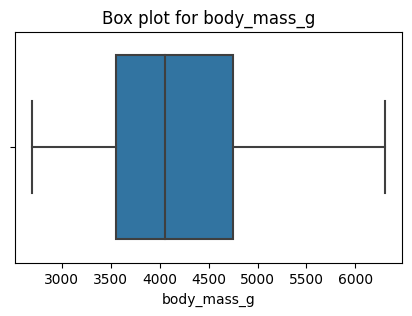

In [ ]:
for i in range(2,6):
  plt.figure(figsize=(5,3))
  sns.boxplot(x=dataset[column_names[i]])
  plt.xlabel(column_names[i])
  plt.title("Box plot for {}".format(column_names[i]))
  plt.show()

BIVARIATE ANALYSIS

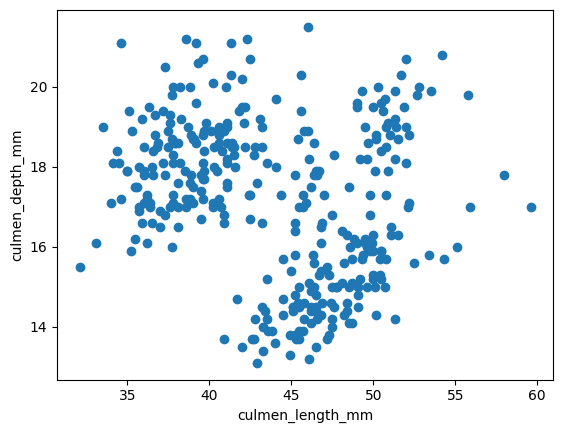

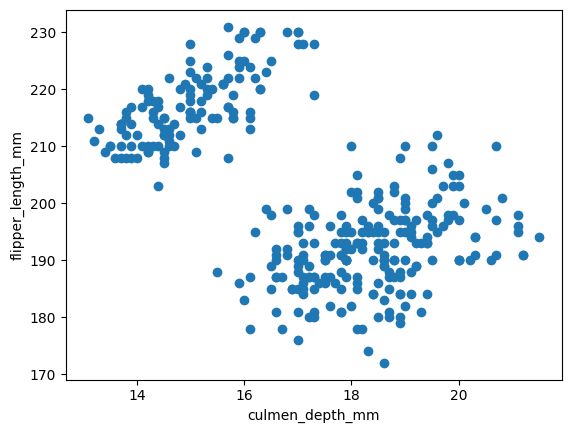

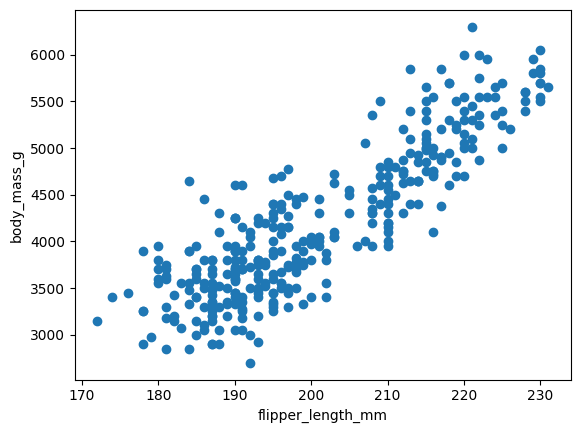

In [ ]:
for i in range(3,6):
  a=dataset[column_names[i-1]]
  b=dataset[column_names[i]]
  plt.scatter(a,b)
  plt.xlabel(column_names[i-1])
  plt.ylabel(column_names[i])
  plt.show()

MULTIVARIATE ANALYSIS

<ipython-input-16-bcea6c5f7baa>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=dataset.corr()


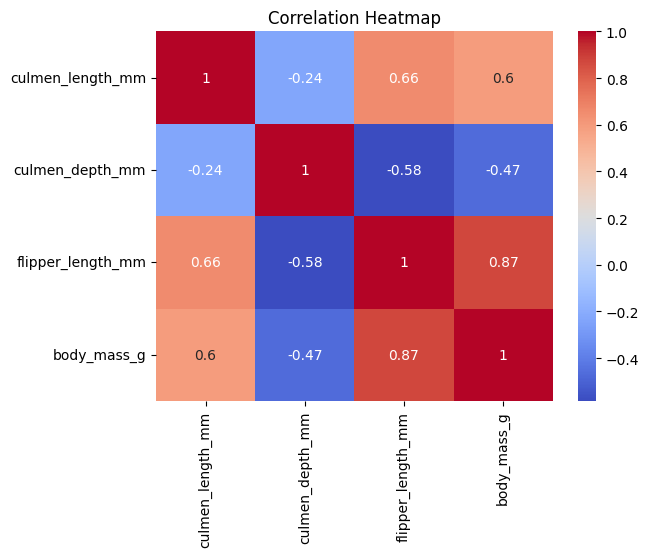

In [ ]:
correlation_matrix=dataset.corr()
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

DESCRIPTIVE STATISTICS

In [ ]:
dataset.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


HANDLING NULL VALUES

In [ ]:
dataset.isnull()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,True,True,True,True,True
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


In [ ]:
mean_value1=dataset['culmen_length_mm'].mean()
dataset['culmen_length_mm'].fillna(mean_value1,inplace=True)

In [ ]:
mean_value2=dataset['culmen_depth_mm'].mean()
dataset['culmen_depth_mm'].fillna(mean_value2, inplace=True)

In [ ]:
mean_value3=dataset['flipper_length_mm'].mean()
dataset['flipper_length_mm'].fillna(mean_value2, inplace=True)

In [ ]:
mean_value4=dataset['body_mass_g'].mean()
dataset['body_mass_g'].fillna(mean_value3, inplace=True)

In [ ]:
dataset['sex'].fillna('NULL',inplace=True)

In [ ]:
dataset.isnull()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
339,False,False,False,False,False,False,False
340,False,False,False,False,False,False,False
341,False,False,False,False,False,False,False
342,False,False,False,False,False,False,False


HANDLING OUTLIERS

In [6]:
def replace(data,threshold=3):
  z_scores=np.abs((data-data.mean())/data.std())
  outliers=z_scores>threshold
  data[outliers]=data.mean()

for column in column_names[2:6]:
  replace(dataset[column])

<ipython-input-6-00463d4e3bb1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[outliers]=data.mean()


CORRELATION OF INDEPENDENT VARIABLES WITH TARGET

In [8]:
target='species'
correlation_matrix=dataset.corr()
correlations_with_target=correlation_matrix[target]
print(correlations_with_target)

<ipython-input-8-d734c3bcd646>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=dataset.corr()


KeyError: ignored

CATEGORICAL COLUMN ENCODING

In [10]:
from sklearn.preprocessing import LabelEncoder
categorical_columns=['species','island','sex']
label_encoder=LabelEncoder()
for column in categorical_columns:
  dataset[column]=label_encoder.fit_transform(dataset[column])

SPLIT DATA INTO DEPENDENT AND INDEPENDENT VARIABLES

In [11]:
dependent_variable=dataset['species']
independent_variables=dataset.drop(columns=['species'])

SCALING THE DATA

In [13]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

min_max_scaler=MinMaxScaler()
standard_scaler=StandardScaler()
scaled_min_max=min_max_scaler.fit_transform(independent_variables)
scaled_standard=standard_scaler.fit_transform(independent_variables)

SPLIT DATA INTO TRAINING AND TESTING

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled_standard,dependent_variable,test_size=0.2,random_state=0)

CHECK THE TRAINING AND TEST DATA SHAPE

In [15]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(275, 6)
(275,)
(69, 6)
(69,)
